# Generate some datasets to test the scaling code on
Just so I do not forget how I generated the tested data

In [44]:
import numpy as np

In [45]:
n_spins = 256
n_samples = 2**14

In [46]:
uncorrelated_dataset = np.random.randint(0, 2, size=(n_spins, n_samples))
np.save("input/uncorrelated_dataset", uncorrelated_dataset)

In [66]:
correlated_dataset = np.random.randint(0, 2, n_samples)
correlated_dataset = np.array([correlated_dataset for _ in range(n_spins)])
np.save("input/correlated_dataset", correlated_dataset)

### Mixed dataset containing 2 clusters of 64 maximally correlated spins and a single cluster of 128 uncorrelated spins

In [68]:
# Initial values
cluster_size = 32
n_clusters = 4
dataset = np.zeros(shape=(n_spins, n_samples))

# Fill dataset
for i in range(n_clusters):
    # Generate cluster in which RVs are 100% correlated
    x = np.random.randint(0, 2, n_samples)
    cluster = np.array([x for _ in range(cluster_size)])
    
    # Add to dataset
    dataset[i*cluster_size:(i+1)*cluster_size] = cluster

# Fill rest of dataset with uncorrelated RVs
dataset[(i+1)*cluster_size:] = np.random.randint(0, 2, size=(128, n_samples))

np.save("input/mixed_correlation_3clusters", dataset)

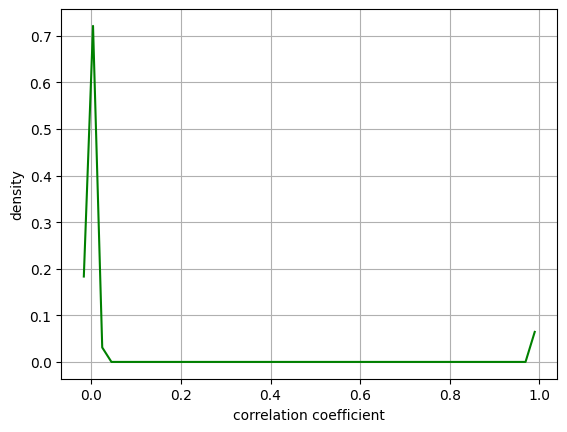

In [69]:
# Compute correlations
pairwise_correlations = np.corrcoef(dataset)

# Create histogram values
bins = 50
hist_counts, hist_edges = np.histogram(pairwise_correlations, bins=bins)
hist_centers = [(hist_edges[i] + hist_edges[i+1]) / 2 for i in range(len(hist_edges) - 1)]

# Change histogram counts to a density
total_count = sum(hist_counts)
hist_density = [hist_counts[i] / total_count for i in range(len(hist_counts))]

# Plot histogram 
plt.plot(hist_centers, hist_density, color="g")
plt.xlabel("correlation coefficient")
plt.ylabel("density")
plt.grid(True)
plt.show()

aliceblue


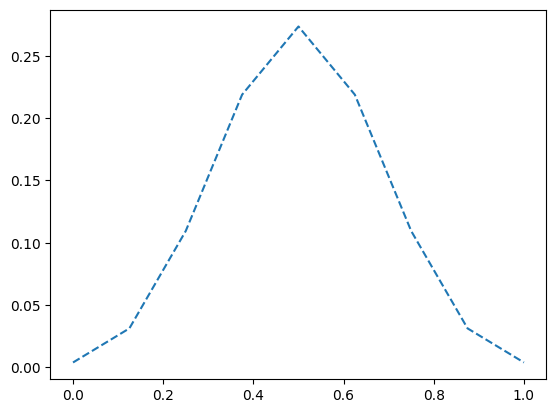

In [43]:
from scipy.stats import binom

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 8, 0.5

x = np.arange(0, n+1)

ax.plot(x/n, binom.pmf(x, n, p), '--', ms=8, label='binom pmf')
import matplotlib.colors as mcolors

print(list(mcolors.cnames.keys())[0])